## Working:

Perceptron works with linearly separable classes.

![](https://drive.google.com/uc?id=1fAjulMDWI7WvX_PPkk0yFqnXXYaqk5s0)

![](https://drive.google.com/uc?id=1rjN7WB_n-L7Q357MdsQDSinBy-Ovjb1e)

![](https://drive.google.com/uc?id=1Orsm8qL1k2152ZWjLTRBAgRnFvuncEgO)

![](https://drive.google.com/uc?id=1jrOUlYykbPwpguJOL9z34fzuX0c_qysK)

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

## Dataset

In [2]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=4)

In [3]:
X.shape, y.shape

((100, 2), (100,))

In [4]:
values, counts = np.unique(y, return_counts=True)
values, counts

(array([0, 1]), array([50, 50]))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [7]:
X_train[:5]

array([[ 9.18887982,  2.9501329 ],
       [ 9.77173434,  5.18922609],
       [ 9.32830519,  3.19925498],
       [11.15179047,  4.36769068],
       [ 9.50698979,  3.03423215]])

In [8]:
y_train[:5]

array([1, 1, 1, 1, 0])

## Model building

In [9]:
# running on the concept of stochastic gradient descent
# if the dataset contains 1000 rows, SGD will update the model parameters 1000 times in one epoch of dataset

class Perceptron:
    def __init__(self, learn_rate, n_iters):
        self.weights = None
        self.bias = None
        self.learn_rate = learn_rate
        self.n_iters = n_iters
        self.activation_func = self.unit_step_func

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)                                     # initialising weights as 0 for all features
        self.bias = 0                                                           # initialising with bias as 0

        y_ = np.array([1 if i > 0 else 0 for i in y])                           # if y in dataset has labels +1 and -1 then convert to +1 and 0

        for epoch in range(self.n_iters):                                       # for every iteration from 1 to 500
            for idx, x_i in enumerate(X):                                       # iterate over each of the training sample -> gives index, current sample
                linear_output = np.dot(x_i, self.weights) + self.bias           # apply linear func on each sample (x_i)
                y_pred = self.activation_func(linear_output)                    # then apply activation func on linear func
                update = self.learn_rate * (y_[idx] - y_pred)                   # finding update = α * (yi - ŷi)
                self.weights += update * x_i                                    # w = w + △w => w = w + α * (yi - ŷi) * xi
                self.bias += update                                             # b = b + α * (yi - ŷi)

            if (epoch%50==0):                                                   # just print weights after some epochs
                print(f'epoch {epoch+1}:')
                print('Weights: ', self.weights)
                print()

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias                     # first apply linear func on multiple samples (X)
        y_pred = self.activation_func(linear_output)                            # then apply activation func on linear func
        return y_pred

    def unit_step_func(self, x):                                                # will work for single/all test samples
        threshold = 0
        return np.where(x>=threshold, 1, 0)                                     # for single sample, return 1 if x>=threshold else 0

In [10]:
model = Perceptron(learn_rate=0.01, n_iters=500)
model.fit(X_train, y_train)                                                     # used to train model and update w, b
y_pred = model.predict(X_test)

epoch 1:
Weights:  [-0.01034709  0.1649765 ]

epoch 51:
Weights:  [-0.20771806  0.87432604]

epoch 101:
Weights:  [-0.11814988  0.95361183]

epoch 151:
Weights:  [-0.11219321  0.92291666]

epoch 201:
Weights:  [-0.08925888  0.91945327]

epoch 251:
Weights:  [-0.09237599  0.8775722 ]

epoch 301:
Weights:  [-0.08258337  0.87106325]

epoch 351:
Weights:  [-0.02551421  0.85879692]

epoch 401:
Weights:  [-0.00842926  0.83380159]

epoch 451:
Weights:  [0.02156197 0.81053726]



In [11]:
y_pred[:5]

array([1, 1, 0, 1, 1])

In [12]:
y_test[:5]

array([0, 1, 0, 1, 1])

## Evaluating test data

In [13]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    return accuracy

In [14]:
acc = accuracy(y_test, y_pred)
print("Accuracy:", acc*100)

Accuracy: 95.0


## Visualization

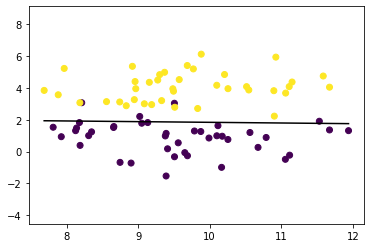

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-model.weights[0] * x0_1 - model.bias) / model.weights[1]
x1_2 = (-model.weights[0] * x0_2 - model.bias) / model.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()